# Problem sheet 2 - Moran Model

This is similar to the Wright-Fisher model from problem sheet 1 (expect continuous time). Population of $L$ individuals. 

Let $N_t = \sum_{i =1}^{L} \delta_{X_{t(i),k}}$ be the number of individuals of a single type, $k \in {1,...,L}$ at time $t$. Initially $N_0 =1 $ for all types. 

Recall, $ \frac{d}{dt} \mathbb{E}[f(N_t)] = \mathbb{E}[\mathcal{L}f(N_t)]$ - useful for part c

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We used am_done function for the wright fisher model

In [2]:
def am_done(v):
    '''Return true if all elements of v the same. Else false.'''
    u=np.unique(v) # unique  elements of v
    if u.shape[0]>1:
        return False
    else:
        return True

### Simulation:
- Run a process with rate $L$. 
- Waiting times are distributed exponentially with mean $\beta = 1/L$. 
- When an event occurs pick an individual uniform at random to reproduce and pick an individual uniform at random to be killed.

In [3]:
### Parameter ###

L=50
maxT = 100
#################

X=np.arange(L)   #initialize current state
  

time=0.0
lastout=0.0
deltat=0.1 #equal time steps
Y=np.zeros((maxT*(1/deltat),L),dtype='int') # initialize output array
# Y=np.zeros((1,L),dtype='int')
Y[0,:]=X
times_list=[] # list of times for sample path

rate=L 
β=1.0/rate # mean wait time, uniformly picking 1/L individual at rate 1

while (time<(maxT-1)): # loop until done 
    wait=np.random.exponential(β) # wait time
    time+=wait
    lastout+=wait  
    
    #record the state closest to each 0.1 time point
    if(lastout>deltat):
        times_list.append(round(time,1)) #may not capture all if wait >0.1
        Y[round(time*(1/deltat)),:] =X
        # Y=np.append(Y,[X],axis=0)
        lastout=0.0
        
    # continue updating the state at every time point
    type_to_spread=np.random.choice(X) 
    idx=np.random.choice(np.arange(L))
    X[idx]=type_to_spread # infect
    X=np.sort(X)    

    if(am_done(X)):
        break    
        

/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  del sys.path[0]


In [5]:
index = [int(a*10) for a in times_list]

/home/emma/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Text(69.0, 0.5, 'Timestep ')

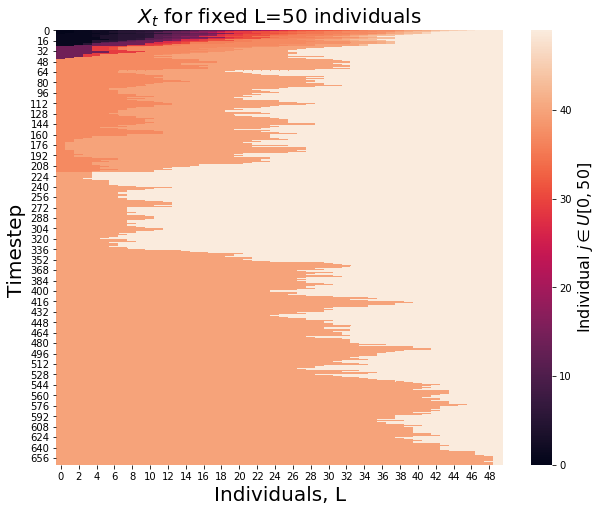

In [6]:
plt.figure(figsize = (10,8))
pcm = sns.heatmap(Y[index,:],cbar_kws={'label': r'Individual $j \in U[0,{}]$'.format(L)})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.title('$X_t$ for fixed L={} individuals'.format(L), fontsize = 20)
plt.xlabel('Individuals, L', fontsize = 20)
plt.ylabel('Timestep ', fontsize = 20)
# plt.yticks(range(len(index)), times_list);

In [7]:
N= np.zeros_like(X)
np.shape(Y)[0]

1000

In [8]:
def X_to_N(X):
    length=np.shape(X)[0]
    L=np.shape(X)[1]
    N=np.zeros((length,L))
    for row in range(length):
        row_list=list(X[row,:])
        for i in range(L):
            N[row,i]=row_list.count(i)   
    return N

In [9]:
N=X_to_N(Y[index,:])

Text(0.5, 1.0, '$N_t$ Number of individuals of each species \n out of total population size L = 50')

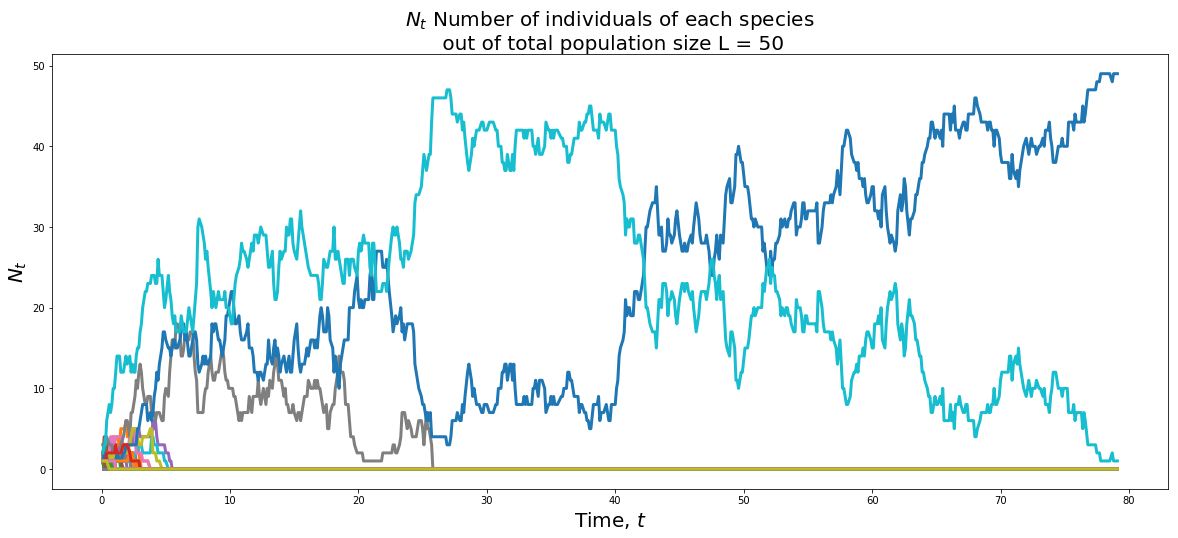

In [10]:
plt.figure(figsize = (20,8))
for i in range(L):
    plt.plot(times_list,N[:,i],lw=3)
    
plt.xlabel('Time, $t$', fontsize = 20)
plt.ylabel('$N_t$', fontsize= 20)

plt.title("$N_t$ Number of individuals of each species \n out of total population size L = {}".format(L), fontsize = 20)